# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = ******************

In [3]:
# Загрузим данные и посмотрим на них

labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
# Создадим функцию отображения изображений
def image_plot(data, label):
    fig = plt.figure(figsize=(10,10))
    for i in range(16):
        fig.add_subplot(4, 4, i+1)
        plt.imshow(data[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Возраст:{label[i]} лет')
        plt.tight_layout()

In [5]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


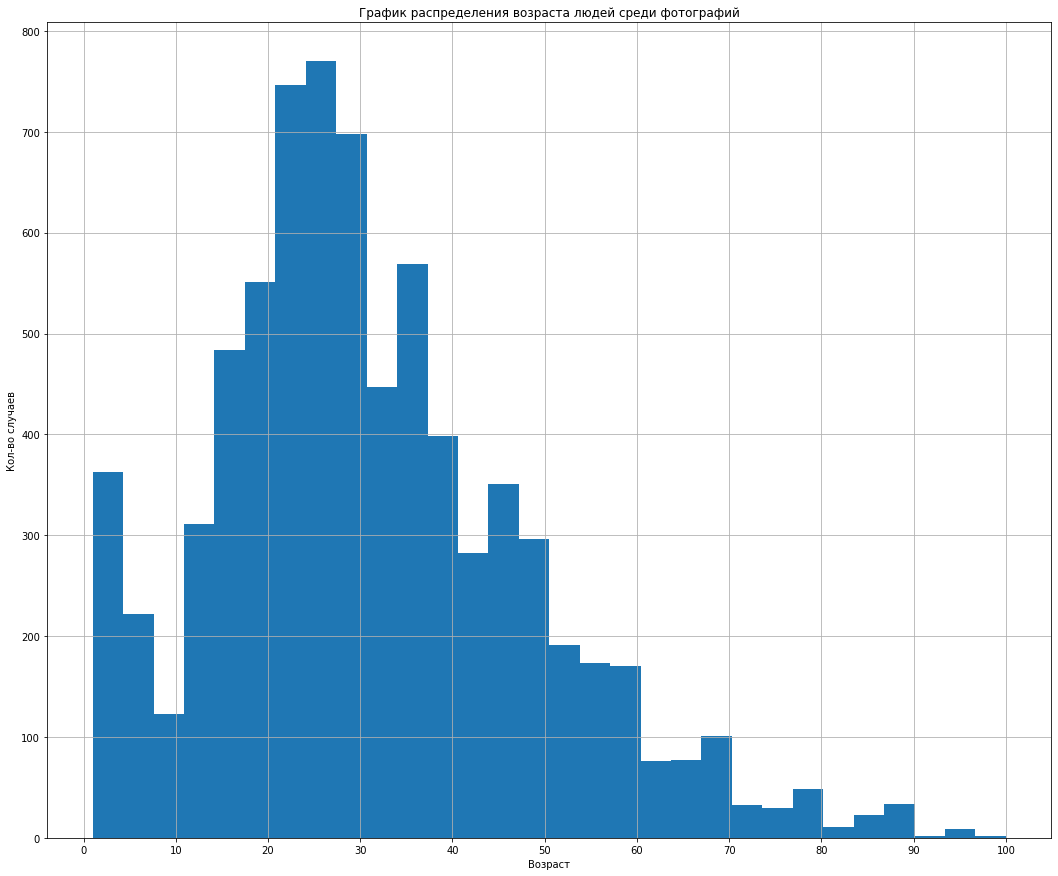

In [6]:
# Построим график распределения возраста в выборке
plt.figure(figsize=(18,15))
plt.hist(data=labels, x='real_age', bins=30)
plt.xticks(np.arange(0,101,10))
plt.xlabel('Возраст')
plt.ylabel('Кол-во случаев')
plt.title('График распределения возраста людей среди фотографий')
plt.grid()

Из графика видно, что основная масса это люди в возрасте от 22 до 31 года, также есть достаточное кол-во детей до 5 лет, пожилых людей в возрасте от 80 и старше крайне мало.

In [7]:
def load_train(path):
    train_data = ImageDataGenerator(rescale=1./255)
    train_flow = train_data.flow_from_dataframe(dataframe=labels,
                                                directory=path,
                                                x_col='file_name',
                                                y_col='real_age',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='raw',
                                                seed=23
                                               )
    return train_flow

In [8]:
train = load_train(path)
feat, target = next(train)

Found 7591 validated image filenames.


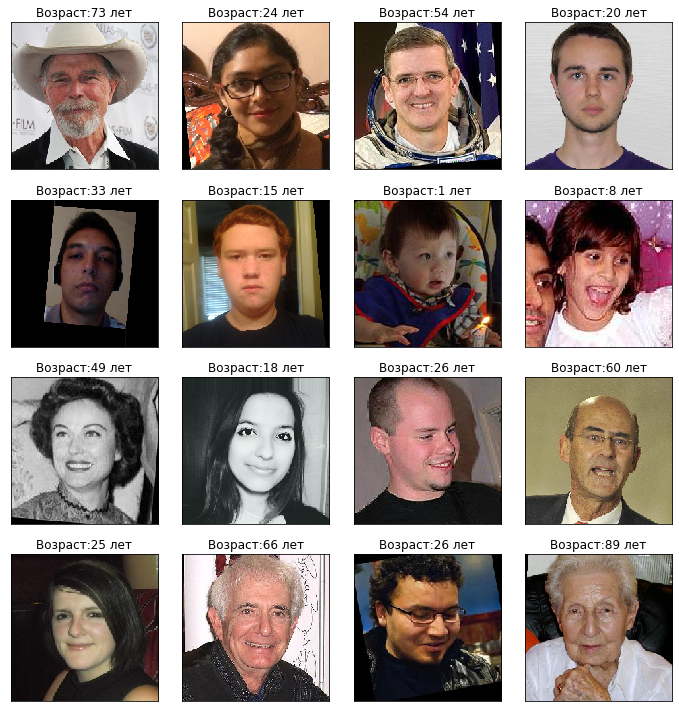

In [9]:
image_plot(feat, target)

Изображения есть как цветные, так и черно-белые, есть сложные изображения, как парень в наушниках слева

## Обучение модели

```python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

def load_train(path):
    train_data = ImageDataGenerator(validation_split=0.25,
                                    rescale=1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2
                                    )
    train_flow = train_data.flow_from_dataframe(dataframe=pd.read_csv(path+'labels.csv'),
                                                directory=path+'final_files/',
                                                x_col='file_name',
                                                y_col='real_age',
                                                target_size=(224, 224),
                                                batch_size=16,
                                                class_mode='raw',
                                                subset = 'training',
                                                seed=23
                                                )
    
    return train_flow

def load_test(path):
    valid_data = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    validation_flow = valid_data.flow_from_dataframe(dataframe=pd.read_csv(path+'labels.csv'),
                                                     directory=path+'final_files/',
                                                     x_col='file_name',
                                                     y_col='real_age',
                                                     target_size=(224, 224),
                                                     batch_size=16,
                                                     class_mode='raw',
                                                     subset = 'validation',
                                                     seed=23
                                                     )

    return validation_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse',
                  metrics=['mae'])
    return model 

def train_model(model, train_data, test_data,
                batch_size=None, epochs=50,
                steps_per_epoch=None,
                validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True
              )
    return model

```

```

Epoch 1/50
356/356 - 95s - loss: 229.6251 - mae: 11.2508 - val_loss: 628.0193 - val_mae: 20.1106
Epoch 2/50
356/356 - 88s - loss: 125.4664 - mae: 8.5317 - val_loss: 279.8921 - val_mae: 12.3735
Epoch 3/50
356/356 - 89s - loss: 104.1741 - mae: 7.7834 - val_loss: 98.1041 - val_mae: 7.5285
Epoch 4/50
356/356 - 88s - loss: 93.9601 - mae: 7.3853 - val_loss: 114.9301 - val_mae: 7.9143
Epoch 5/50
356/356 - 88s - loss: 85.3474 - mae: 7.0343 - val_loss: 87.5755 - val_mae: 7.0934
Epoch 6/50
356/356 - 88s - loss: 75.1902 - mae: 6.6580 - val_loss: 78.9534 - val_mae: 6.8468
Epoch 7/50
356/356 - 88s - loss: 65.4222 - mae: 6.2338 - val_loss: 83.2141 - val_mae: 6.8214
Epoch 8/50
356/356 - 88s - loss: 63.7716 - mae: 6.0799 - val_loss: 223.5990 - val_mae: 11.6678
Epoch 9/50
356/356 - 88s - loss: 60.3279 - mae: 5.9017 - val_loss: 123.1917 - val_mae: 8.5723
Epoch 10/50
356/356 - 88s - loss: 52.1137 - mae: 5.5704 - val_loss: 108.1710 - val_mae: 8.2344
Epoch 11/50
356/356 - 88s - loss: 47.4152 - mae: 5.3028 - val_loss: 88.0770 - val_mae: 7.0855
Epoch 12/50
356/356 - 88s - loss: 49.7274 - mae: 5.3962 - val_loss: 86.3671 - val_mae: 6.9132
Epoch 13/50
356/356 - 88s - loss: 45.9624 - mae: 5.2032 - val_loss: 94.2863 - val_mae: 7.1212
Epoch 14/50
356/356 - 88s - loss: 41.4477 - mae: 4.9371 - val_loss: 80.0753 - val_mae: 6.5753
Epoch 15/50
356/356 - 88s - loss: 39.4734 - mae: 4.8406 - val_loss: 91.7246 - val_mae: 7.0396
Epoch 16/50
356/356 - 88s - loss: 35.1212 - mae: 4.5505 - val_loss: 77.9469 - val_mae: 6.4824
Epoch 17/50
356/356 - 88s - loss: 35.1273 - mae: 4.5751 - val_loss: 83.5769 - val_mae: 6.4794
Epoch 18/50
356/356 - 88s - loss: 33.2255 - mae: 4.4581 - val_loss: 88.9814 - val_mae: 7.2141
Epoch 19/50
356/356 - 88s - loss: 33.2820 - mae: 4.4382 - val_loss: 86.3631 - val_mae: 6.8018
Epoch 20/50
356/356 - 88s - loss: 31.5218 - mae: 4.2832 - val_loss: 77.5332 - val_mae: 6.6538
Epoch 21/50
356/356 - 88s - loss: 31.1506 - mae: 4.2481 - val_loss: 82.4452 - val_mae: 6.6167
Epoch 22/50
356/356 - 88s - loss: 30.2564 - mae: 4.2151 - val_loss: 87.4714 - val_mae: 7.0100
Epoch 23/50
356/356 - 88s - loss: 27.7717 - mae: 4.0548 - val_loss: 73.4371 - val_mae: 6.2151
Epoch 24/50
356/356 - 88s - loss: 26.1048 - mae: 3.9592 - val_loss: 130.0900 - val_mae: 8.5362
Epoch 25/50
356/356 - 88s - loss: 24.9204 - mae: 3.8435 - val_loss: 73.3630 - val_mae: 6.3182
Epoch 26/50
356/356 - 88s - loss: 24.0439 - mae: 3.7565 - val_loss: 85.7678 - val_mae: 6.9745
Epoch 27/50
356/356 - 88s - loss: 22.6152 - mae: 3.6870 - val_loss: 69.3337 - val_mae: 6.1495
Epoch 28/50
356/356 - 88s - loss: 24.3440 - mae: 3.7398 - val_loss: 131.2198 - val_mae: 8.8989
Epoch 29/50
356/356 - 88s - loss: 29.4325 - mae: 4.1638 - val_loss: 81.0723 - val_mae: 6.4891
Epoch 30/50
356/356 - 88s - loss: 22.4161 - mae: 3.6660 - val_loss: 68.3515 - val_mae: 6.1203
Epoch 31/50
356/356 - 88s - loss: 21.2843 - mae: 3.5534 - val_loss: 77.7988 - val_mae: 6.7541
Epoch 32/50
356/356 - 88s - loss: 19.4111 - mae: 3.3793 - val_loss: 76.3378 - val_mae: 6.4346
Epoch 33/50
356/356 - 88s - loss: 17.7046 - mae: 3.2617 - val_loss: 74.1435 - val_mae: 6.3152
Epoch 34/50
356/356 - 88s - loss: 18.2424 - mae: 3.2730 - val_loss: 74.9977 - val_mae: 6.2641
Epoch 35/50
356/356 - 88s - loss: 18.1926 - mae: 3.2604 - val_loss: 72.5271 - val_mae: 6.3281
Epoch 36/50
356/356 - 88s - loss: 18.7936 - mae: 3.3456 - val_loss: 75.5410 - val_mae: 6.2653
Epoch 37/50
356/356 - 88s - loss: 18.0225 - mae: 3.2574 - val_loss: 79.2341 - val_mae: 6.5889
Epoch 38/50
356/356 - 88s - loss: 17.4822 - mae: 3.1957 - val_loss: 85.2018 - val_mae: 6.7851
Epoch 39/50
356/356 - 88s - loss: 17.0027 - mae: 3.1683 - val_loss: 74.1556 - val_mae: 6.3603
Epoch 40/50
356/356 - 88s - loss: 16.0142 - mae: 3.0954 - val_loss: 68.6711 - val_mae: 6.1501
Epoch 41/50
356/356 - 88s - loss: 16.4986 - mae: 3.1019 - val_loss: 79.8054 - val_mae: 6.4371
Epoch 42/50
356/356 - 88s - loss: 25.8178 - mae: 3.7718 - val_loss: 77.4574 - val_mae: 6.4378
Epoch 43/50
356/356 - 88s - loss: 19.3704 - mae: 3.3741 - val_loss: 68.2020 - val_mae: 6.0440
Epoch 44/50
356/356 - 89s - loss: 16.0630 - mae: 3.0586 - val_loss: 72.5121 - val_mae: 6.2185
Epoch 45/50
356/356 - 89s - loss: 15.6090 - mae: 3.0312 - val_loss: 74.4218 - val_mae: 6.2711
Epoch 46/50
356/356 - 88s - loss: 13.5090 - mae: 2.8331 - val_loss: 66.6564 - val_mae: 6.0058
Epoch 47/50
356/356 - 89s - loss: 12.9787 - mae: 2.7539 - val_loss: 66.7241 - val_mae: 6.0324
Epoch 48/50
356/356 - 88s - loss: 14.0210 - mae: 2.8637 - val_loss: 71.7589 - val_mae: 6.2254
Epoch 49/50
356/356 - 88s - loss: 12.4244 - mae: 2.7189 - val_loss: 78.1381 - val_mae: 6.6216
Epoch 50/50
356/356 - 89s - loss: 11.9718 - mae: 2.6693 - val_loss: 70.5273 - val_mae: 6.2082

```

## Анализ обученной модели

Вывод: мы обучили нейронную сеть определять возраст человека на фотографии, среднее отклоенение составляет 6,2 года в конечном расчете. За первые 10 эпох модлеь быстро "спустилась" с 20 лет до 7-8 лет, а дальше уже доучивалась, поэтому метрика колебалась в районе 6-6,5 лет. Несмотря на неплохие показатели, мы не получили желаемый результат: алкоголь кассиры могут продавать лицам не достигшие 18 лет, а фотофиксация покажет 24 года. Придется полагаться на добросовестность кассиров.